In [1]:
import sys
sys.path.append('../../covid19_inference-model_cleanup')
import covid19_inference as cov19
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

Plotting icu cases for different countries i.e. Belgium, Greece, Italy, Netherlands, Portugal, Spain, Slovenia, Sweden, Switzerland.


## Create big icu dict with every country

In [21]:
icu = dict()

def create_df(date,y):
    df = pd.DataFrame()
    df["date"] = date
    df["cases"] = y
    df.set_index("date")
    return df

### Austria

### Belgium

In [26]:
temp = pd.read_csv("https://epistat.sciensano.be/Data/COVID19BE_HOSP.csv")
temp["DATE"] = pd.to_datetime(temp["DATE"])
temp = temp.rename(columns={"DATE": "date"})
temp = temp.set_index("date")

In [27]:
in_icu = [(date, temp.loc[date].TOTAL_IN_ICU.sum()) for date in pd.date_range(temp.index[0],temp.index[-1])]
in_icu = np.array(in_icu)
icu["Belgium"] = create_df(in_icu[:,0],in_icu[:,1])

### Greece
https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Greece#Statistics

In [45]:
inicu = [0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,3,5,5,8,9,11,13,16,20,18,34,34,45,53,57,66,69,69,69,85,90,91,92,91,93,90,90,84,79,77,75,76,73,76,72,69,71,67,67,61,59,55,52,48,47,46,43,40,41,38,36,37,37,35,35,36,33,32,28,30,32,32,28,24,23,23,22,24,22,22,21,19,20,19,18,18,17,16,16,14,13,12]
dateicu = pd.date_range(datetime.datetime(2020,2,26),datetime.datetime(2020,6,1))

In [46]:
icu["Greece"] = create_df(in_icu[:,0],in_icu[:,1])

### Italy

In [47]:
temp = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv")
temp["data"] = pd.to_datetime(temp["data"])
temp = temp.rename(columns={"terapia_intensiva": "icu","data":"date"})

In [48]:
icu["Italy"] = create_df(temp["date"],temp.icu)

### Netherlands

In [49]:
temp = pd.read_csv("https://opendata.arcgis.com/datasets/c121a3cd3ca34e7b8050513307d41b93_0.csv")
temp["date"] = pd.to_datetime(temp["date"])

In [50]:
icu["Netherlands"] = create_df(temp["date"],temp.intakeCount)

# TODO:
add more countries
plot against total number of cases i.e. fraction

## Plot

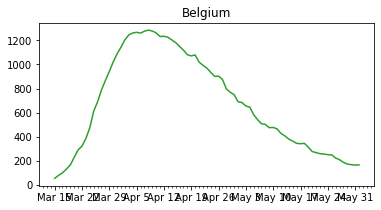

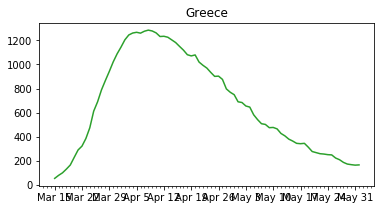

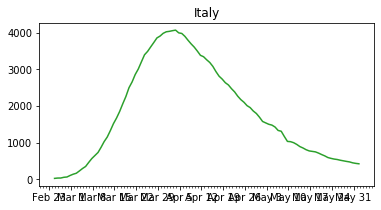

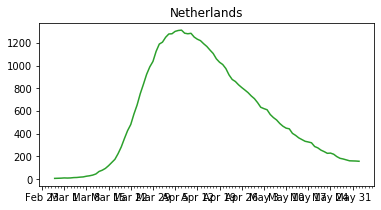

In [55]:
for key in icu:
    ax = cov19.plot._timeseries(icu[key]["date"],icu[key]["cases"],what="model")
    cov19.plot._format_date_xticks(ax)
    ax.set_title(key)